<p style="color:black;">This information describes the attributes or features in the dataset, and the last one, "NObeyesdad," represents the target variable or the label used for classifying obesity levels. The dataset contains information about individuals from Colombia, Peru, and Mexico and is used to predict obesity levels based on their eating habits and physical conditions.

1. Gender
2. Age
3. Height
4. Weight
5. Family History with Overweight
6. FAVC (Frequent Consumption of High Caloric Foods)
7. FCVC (Frequency of Consumption of Vegetables)
8. NCP (Number of Main Meals)
9. CAEC (Consumption of Food Between Meals)
10. SMOKE (Smoking Habit)
11. CH2O (Consumption of Water Daily)
12. SCC (Calories Consumption Monitoring)
13. FAF (Physical Activity Frequency)
14. TUE (Time Using Technology Devices)
15. CALC (Consumption of Alcohol)
16. MTRANS (Transportation Used)
17. NObeyesdad (Number of Obesity Diseases)</p>

**IMPORT LIBRARIES**

In [134]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [135]:
file_path = "D:\\Downloads\\archive (1)\\ObesityDataSet_raw_and_data_sinthetic.csv"

In [136]:
df = pd.read_csv(file_path)

<h3 style="color:black;"><b>Preprocessing & Exploratory Data Analysis(EDA)</b></h3>

<h4 style="color:black;"><b>Preprocessing</b></h4>

In [137]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [138]:
df = df.rename(columns = {'family_history_with_overweight':'FHWO', 'NObeyesdad':'BMI'})

In [139]:
df.shape

(2111, 17)

In [140]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [141]:
df.tail()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [142]:
df.sample(5)

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
1975,Female,26.00000,1.656465,111.949972,yes,yes,3.000000,3.0,Sometimes,no,2.784303,no,0.000000,0.127775,Sometimes,Public_Transportation,Obesity_Type_III
1956,Female,26.00000,1.654784,111.933152,yes,yes,3.000000,3.0,Sometimes,no,2.770125,no,0.000000,0.088236,Sometimes,Public_Transportation,Obesity_Type_III
1770,Male,25.32920,1.771817,114.004832,yes,yes,1.528331,3.0,Sometimes,no,2.079353,no,1.522429,0.228598,Sometimes,Public_Transportation,Obesity_Type_II
359,Female,33.00000,1.560000,48.000000,yes,no,2.000000,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
525,Female,19.86997,1.520997,42.000000,no,yes,3.000000,1.0,Frequently,no,1.527036,no,0.000000,0.860497,Sometimes,Public_Transportation,Insufficient_Weight


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [144]:
df.isna().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

In [145]:
df.dtypes

Gender     object
Age       float64
Height    float64
Weight    float64
FHWO       object
FAVC       object
FCVC      float64
NCP       float64
CAEC       object
SMOKE      object
CH2O      float64
SCC        object
FAF       float64
TUE       float64
CALC       object
MTRANS     object
BMI        object
dtype: object

In [146]:
df.describe(include='all')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [147]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

<h4 style="color:black;"><b>Preprocessing Reports</b></h4>

- Attribute = 17
- Records = 2111
- Features = 16
- Label/Target = 1
- Target: BMI

<h4 style="color:black;"><b>Categorical Columns</b></h4>

In [148]:
categorical_columns = df.columns[df.dtypes == 'object']

In [149]:
categorical_columns

Index(['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS',
       'BMI'],
      dtype='object')

In [150]:
good_label_columns = categorical_columns[0:-1]

In [151]:
good_label_columns

Index(['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], dtype='object')

<h4 style="color:black;"><b>Unique Values Count of Categorical Features</b></h4>

In [152]:
for col in df[categorical_columns]:
    value_count = df[col].value_counts()
    print()
    print(f'Unique Values {col}:{value_count}')


Unique Values Gender:Gender
Male      1068
Female    1043
Name: count, dtype: int64

Unique Values FHWO:FHWO
yes    1726
no      385
Name: count, dtype: int64

Unique Values FAVC:FAVC
yes    1866
no      245
Name: count, dtype: int64

Unique Values CAEC:CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Unique Values SMOKE:SMOKE
no     2067
yes      44
Name: count, dtype: int64

Unique Values SCC:SCC
no     2015
yes      96
Name: count, dtype: int64

Unique Values CALC:CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Unique Values MTRANS:MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Unique Values BMI:BMI
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    29

<h4 style="color:black;"><b>Transformation</b></h4>

In [153]:
df_transform = df.copy()
ordinal_encoder = OrdinalEncoder()
df_transform[good_label_columns] = ordinal_encoder.fit_transform(df_transform[good_label_columns])

In [154]:
df_transform

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,Normal_Weight
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,Normal_Weight
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,Normal_Weight
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,Overweight_Level_I
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,Obesity_Type_III
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,Obesity_Type_III
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,Obesity_Type_III
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,Obesity_Type_III


In [155]:
dict_to_replace = {"BMI" :{"Obesity_Type_I": 4,
"Obesity_Type_III":       6,
"Obesity_Type_II":        5,
"Overweight_Level_I":     2,
"Overweight_Level_II":    3,
"Normal_Weight":          1,
"Insufficient_Weight":    0}}

df_transform.replace(dict_to_replace, inplace = True)

In [156]:
df_transform.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,2
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,3


In [157]:
df_transform.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [158]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   float64
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   float64
 5   FAVC    2111 non-null   float64
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   float64
 9   SMOKE   2111 non-null   float64
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   float64
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   float64
 15  MTRANS  2111 non-null   float64
 16  BMI     2111 non-null   int64  
dtypes: float64(16), int64(1)
memory usage: 280.5 KB


In [159]:
corr = df_transform.corr()

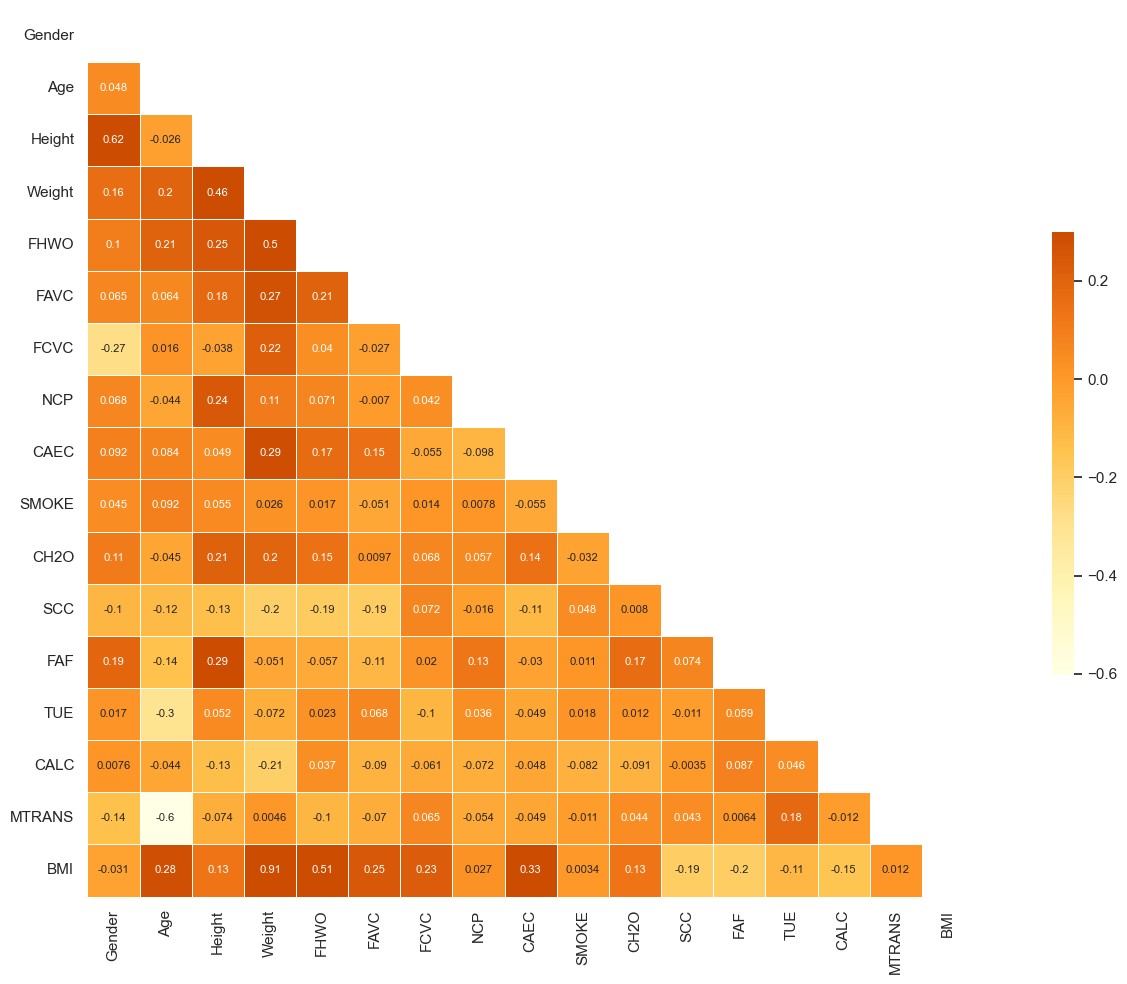

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white')
f, ax = plt.subplots(figsize = (16, 10))
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.color_palette("YlOrBr", as_cmap = True)
sns.heatmap(corr, mask=mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink':.5},
            annot = True, annot_kws = {'size':8})
plt.tight_layout()
plt.show()


d:\Obesity_Pred\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


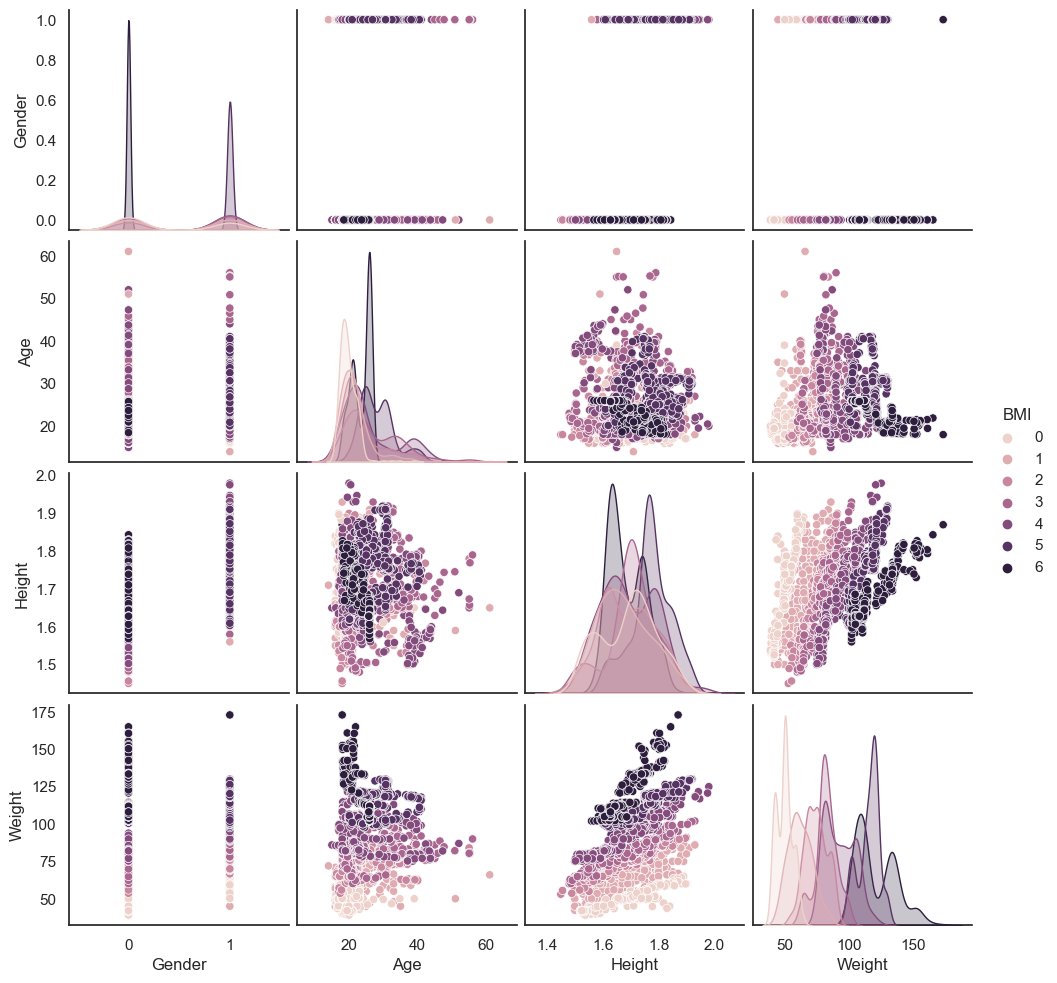

In [161]:
sns.pairplot(df_transform, hue = 'BMI', vars = ['Gender', 'Age', 'Height', 'Weight'])
plt.show()

<h4 style="color:black;"><b>Seperate the Target and Features from Dataset</b></h4>

In [162]:
target_name = 'BMI'
labels = df_transform[target_name]
features = df_transform.drop(target_name, axis = 1)

In [163]:
features

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0


In [164]:
features

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0


In [165]:
for col in features:
    if col == 'Height' or col =='Weight' or col == 'CH2O' or col == 'FAF' or col =='TUE':
        features[col] = np.round(features[col],2)
        
    else:
        features[col] = features[col].astype('int')
    

In [166]:
features

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21,1.62,64.00,1,0,2,3,2,0,2.00,0,0.00,1.00,3,3
1,0,21,1.52,56.00,1,0,3,3,2,1,3.00,1,3.00,0.00,2,3
2,1,23,1.80,77.00,1,0,2,3,2,0,2.00,0,2.00,1.00,1,3
3,1,27,1.80,87.00,0,0,3,3,2,0,2.00,0,2.00,0.00,1,4
4,1,22,1.78,89.80,0,0,2,1,2,0,2.00,0,0.00,0.00,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.71,131.41,1,1,3,3,2,0,1.73,0,1.68,0.91,2,3
2107,0,21,1.75,133.74,1,1,3,3,2,0,2.01,0,1.34,0.60,2,3
2108,0,22,1.75,133.69,1,1,3,3,2,0,2.05,0,1.41,0.65,2,3
2109,0,24,1.74,133.35,1,1,3,3,2,0,2.85,0,1.14,0.59,2,3


<h4 style="color:black;"><b>Fitting</b></h4>

In [169]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
features = MinMaxScaler().fit_transform(features)

In [172]:
%%time
best_accuracy_train = 0.0
best_accuracy_test = 0.0
best_random_state = None
rs_range = np.arange(1, 2000)
acc_test_list = np.zeros(len(rs_range))
test_list = {}

for i in rs_range:
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size = .80, random_state = i)
    rfc = RandomForestClassifier(random_state=i)
    rfc.fit(train_features, train_labels)
    train_score = rfc.score(train_features, train_labels)
    test_score = rfc.score(test_features, test_labels)

    acc_test_list[i-1] = test_score

    if train_score > best_accuracy_train:
        best_accuracy_train = train_score
        best_random_state = i

    if test_score > best_accuracy_test:
        best_accuracy_test = test_score
        best_random_state = i
        rfc_best = rfc
        test_list[f"{i}"] = test_score
print(f"Train Score :{best_accuracy_train}")
print(f"Test Score :{best_accuracy_test}")
print(f"Best Random State :{best_random_state}")

Train Score :1.0
Test Score :0.9810874704491725
Best Random State :892
CPU times: total: 15min 33s
Wall time: 18min 55s


In [173]:
max_test = max(acc_test_list)
loc_maxtest = np.where(acc_test_list == max_test)
rs_maxtest = rs_range[loc_maxtest]

print(f"Max_Test :{max_test}")
print(f"rs :{rs_maxtest[0]}")

Max_Test :0.9810874704491725
rs :892


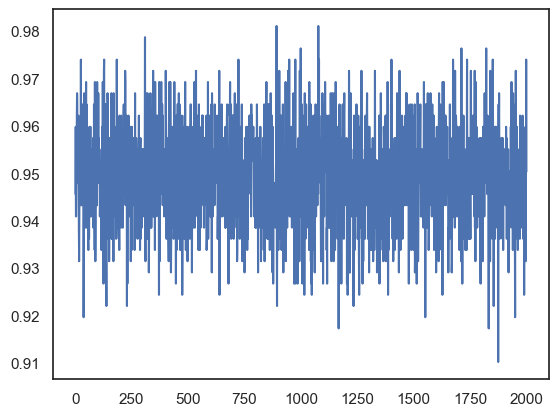

In [174]:
plt.plot(rs_range, acc_test_list)

In [175]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=.80, random_state = best_random_state
)

rfc_best = RandomForestClassifier(random_state = best_random_state)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)

test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)

cm = confusion_matrix(test_labels, rfc_pred)

report_best = classification_report(test_labels, rfc_pred, digits = 4)

print(f"Train Score : {train_score}")
print(f"Test Score :{test_score}")

print(f"Classification Report of Random Forest Classifier :\n {report_best}")

Train Score : 1.0
Test Score :0.9810874704491725
Classification Report of Random Forest Classifier :
               precision    recall  f1-score   support

           0     1.0000    0.9516    0.9752        62
           1     0.9057    0.9600    0.9320        50
           2     0.9434    1.0000    0.9709        50
           3     1.0000    0.9643    0.9818        56
           4     1.0000    0.9851    0.9925        67
           5     1.0000    1.0000    1.0000        70
           6     1.0000    1.0000    1.0000        68

    accuracy                         0.9811       423
   macro avg     0.9784    0.9801    0.9789       423
weighted avg     0.9822    0.9811    0.9813       423



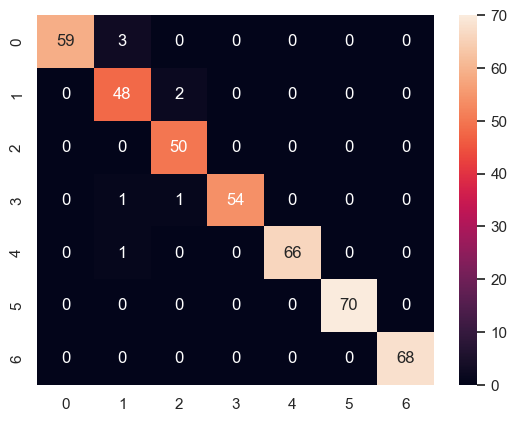

In [176]:
sns.heatmap(confusion_matrix(test_labels, rfc_pred), annot = True, fmt = 'd')
plt.show()

<h4 style="color:black;"><b>Feature Importance</b></h4>

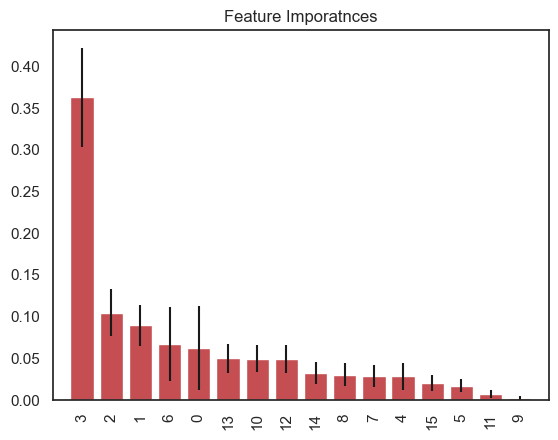

In [179]:
importances = rfc_best.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc_best.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
plt.figure()
plt.title('Feature Imporatnces')
plt.bar(range(features.shape[1]), importances[indices],
        color = 'r', yerr = std[indices], align = 'center')

plt.xticks(range(features.shape[1]), pd.DataFrame(features).columns[indices], rotation = 'vertical')
plt.xlim([-1, features.shape[1]])
plt.show()

<h3 style="color:black;"><b>Hyperparameter</b></h3>

<h4 style="color:black;"><b>Using GridSearchCV</b></h4>

In [182]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [181]:
param_grid = {
    'n_estimators' : [100, 100],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [10, 50]
    
}

# Create GridSearchCV object with 5-fold cross validation
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

# Fit the GridSearchCV object to the data
CV_rfc.fit(train_features, train_labels)

# Print the best hyperparameters found
print(f"Best Hyperparameters :{CV_rfc.best_params_}")

best_model = CV_rfc.best_estimator_

train_preds = best_model.predict(train_features)
train_acc = accuracy_score(train_labels, train_preds)

test_preds = best_model.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)

print(f"Train Accuracy : {train_acc}")
print(f"Test Accuracy : {test_acc}")

Best Hyperparameters :{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}
Train Accuracy : 1.0
Test Accuracy : 0.9881796690307328


<h4 style="color:black;"><b>Using RandomSearchCV</b></h4>

In [188]:
rfc_h = RandomForestClassifier(random_state = best_random_state)

param_random = {
    'n_estimators': [int(x) for x in np.linspace(100, 300, num = 10)],
    'max_features':['sqrt', 'log2', 10, 12, 15],
    'max_depth':[int(x) for x in np.linspace(10, 50, num = 10)],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf': [1,2,3],
    'criterion':['gini','entropy'],
    'bootstrap':[True, False]
}


# Create a Randomized Search Object
random_search = RandomizedSearchCV(estimator = rfc_h, param_distributions = param_random,
                                   n_iter = 50, cv = 10, verbose = True, n_jobs = -1)

# Fit the Randomized Search Object to The Training Data
random_search.fit(train_features, train_labels)

# Print the Best Parameters and score
print(f"Best Parameters :{random_search.best_params_}")

# Get the best estimator from Randomized search
best_rfc = random_search.best_estimator_

# Evaluate the model on Train and Test sets
train_acc = best_rfc.score(train_features, train_labels)

test_acc = best_rfc.score(test_features, test_labels)

rfc_hyperRS = best_rfc.predict(test_features)

cm_hyper = confusion_matrix(test_labels, rfc_hyperRS)

report_hyperRS = classification_report(test_labels, rfc_hyperRS, digits = 4)

print(f"Train Accuracy :{train_acc}")
print(f"Test Accuracy :{test_acc}")

print(f"\n {report_hyperRS}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters :{'n_estimators': 166, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 32, 'criterion': 'entropy', 'bootstrap': False}
Train Accuracy :1.0
Test Accuracy :0.9905437352245863

               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        62
           1     0.9796    0.9600    0.9697        50
           2     0.9608    0.9800    0.9703        50
           3     1.0000    1.0000    1.0000        56
           4     1.0000    0.9851    0.9925        67
           5     0.9859    1.0000    0.9929        70
           6     1.0000    1.0000    1.0000        68

    accuracy                         0.9905       423
   macro avg     0.9895    0.9893    0.9893       423
weighted avg     0.9906    0.9905    0.9905       423



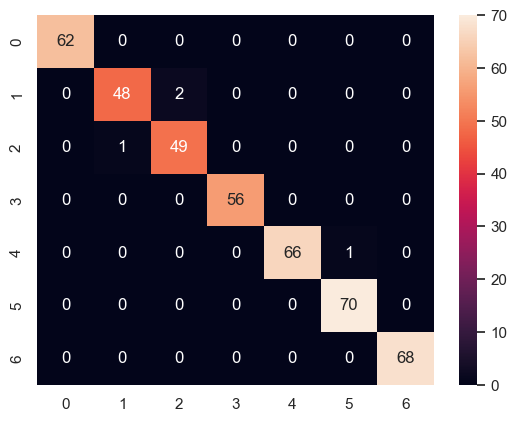

In [189]:
sns.heatmap(cm_hyper, annot = True, fmt = 'd')
plt.show()